In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.impute import SimpleImputer

# Create a sample dataset
data = {
    'Feature1': [5, 7, 8, np.nan, 10, 7, 5, 6],
    'Feature2': [1, 2, 1, 3, 4, np.nan, 2, 1],
    'Feature3': [3, 2, 1, 4, 3, 2, 4, 5],
    'Target': [1, 0, 1, 0, 1, 0, 1, 0]
}

# Load the dataset into a DataFrame
df = pd.DataFrame(data)

# Task 1: Identify columns with missing values
missing_values = df.isnull().sum()
print("Columns with missing values and their count:")
print(missing_values[missing_values > 0])

# Task 2: Replace missing values with mean (for numerical columns) or mode (for categorical columns)
# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Replace missing numerical values with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Verify if missing values are handled
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Task 3: Compare model performance with and without handling missing values

# Split the data into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model without handling missing values (using the original dataset)
df_original = pd.DataFrame(data)  # Load original dataset
X_original = df_original.drop('Target', axis=1)
y_original = df_original['Target']

# Impute missing values in the original dataset before splitting into train/test
imputer = SimpleImputer(strategy='mean')
X_original_imputed = imputer.fit_transform(X_original)

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original_imputed, y_original, test_size=0.2, random_state=42)

# Train model on original dataset (with imputation)
model = LogisticRegression(max_iter=200)
model.fit(X_train_orig, y_train_orig)
y_pred_orig = model.predict(X_test_orig)

# Evaluate accuracy on original dataset
accuracy_without_handling = accuracy_score(y_test_orig, y_pred_orig)
print(f"\nAccuracy without handling missing values: {accuracy_without_handling:.4f}")

# Train model after handling missing values (already done in the df)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate accuracy after handling missing values
accuracy_with_handling = accuracy_score(y_test, y_pred)
print(f"\nAccuracy after handling missing values: {accuracy_with_handling:.4f}")

Columns with missing values and their count:
Feature1    1
Feature2    1
dtype: int64

Missing values after imputation:
Feature1    0
Feature2    0
Feature3    0
Target      0
dtype: int64

Accuracy without handling missing values: 0.0000

Accuracy after handling missing values: 0.0000


In [2]:
import pandas as pd
import numpy as np

# Sample dataset with duplicates
data = {
    'Feature1': [1, 2, 3, 4, 5, 1, 2],
    'Feature2': [5, 6, 7, 8, 9, 5, 6],
    'Feature3': [9, 10, 11, 12, 13, 9, 10],
    'Target': [0, 1, 0, 1, 0, 0, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Task 1: Identify and remove duplicate entries
print("Dataset before removing duplicates:")
print(df)

# Shape of the dataset before removal
print(f"\nShape before removing duplicates: {df.shape}")

# Remove duplicate entries
df_no_duplicates = df.drop_duplicates()

# Task 2: Document the shape after removing duplicates
print("\nDataset after removing duplicates:")
print(df_no_duplicates)

# Shape of the dataset after removal
print(f"\nShape after removing duplicates: {df_no_duplicates.shape}")

# Task 3: Explain to a classmate how duplicate data can affect prediction accuracy
print("\nExplanation: ")
print("Duplicate data can skew the model training process. It can lead to overfitting by giving certain data points more weight than they deserve. "
      "This results in a model that performs well on the training data but doesn't generalize well to unseen data, lowering the prediction accuracy. "
      "Removing duplicates ensures that each data point is counted only once, providing a more accurate and generalizable model.")

Dataset before removing duplicates:
   Feature1  Feature2  Feature3  Target
0         1         5         9       0
1         2         6        10       1
2         3         7        11       0
3         4         8        12       1
4         5         9        13       0
5         1         5         9       0
6         2         6        10       1

Shape before removing duplicates: (7, 4)

Dataset after removing duplicates:
   Feature1  Feature2  Feature3  Target
0         1         5         9       0
1         2         6        10       1
2         3         7        11       0
3         4         8        12       1
4         5         9        13       0

Shape after removing duplicates: (5, 4)

Explanation: 
Duplicate data can skew the model training process. It can lead to overfitting by giving certain data points more weight than they deserve. This results in a model that performs well on the training data but doesn't generalize well to unseen data, lowering the predictio

In [3]:
import pandas as pd
import numpy as np

# Sample dataset with incorrect data types
data = {
    'Feature1': ['1', '2', '3', '4', '5'],  # This column contains numbers as strings
    'Feature2': [10.0, 20.0, 30.0, 40.0, 50.0],  # This column is of type float
    'Feature3': ['Yes', 'No', 'Yes', 'No', 'Yes'],  # This is categorical data
    'Target': ['0', '1', '0', '1', '0']  # Target variable stored as string
}

# Create a DataFrame
df = pd.DataFrame(data)

# Task 1: Convert 'Feature1' and 'Target' columns from string to integer
df['Feature1'] = df['Feature1'].astype(int)  # Convert string numbers to integers
df['Target'] = df['Target'].astype(int)  # Convert string target to integers

# Task 2: Identify and correct columns with inconsistent data types
print("Before type correction:")
print(df.dtypes)

# Let's say 'Feature2' should actually be an integer
df['Feature2'] = df['Feature2'].astype(int)  # Convert float to integer if needed

# Task 2: Check data types after correction
print("\nAfter type correction:")
print(df.dtypes)

# Task 3: Explanation
print("\nExplanation: ")
print("Correct data types are crucial for feature engineering because models expect data in a specific format.")
print("For example, a model that expects numeric values will fail if provided with strings.")
print("Additionally, some machine learning algorithms may require categorical data to be encoded correctly as integers or dummy variables.")
print("Correcting data types ensures that operations such as scaling, encoding, and transformations are applied correctly, which is vital for building an accurate model.")
    

Before type correction:
Feature1      int64
Feature2    float64
Feature3     object
Target        int64
dtype: object

After type correction:
Feature1     int64
Feature2     int64
Feature3    object
Target       int64
dtype: object

Explanation: 
Correct data types are crucial for feature engineering because models expect data in a specific format.
For example, a model that expects numeric values will fail if provided with strings.
Additionally, some machine learning algorithms may require categorical data to be encoded correctly as integers or dummy variables.
Correcting data types ensures that operations such as scaling, encoding, and transformations are applied correctly, which is vital for building an accurate model.


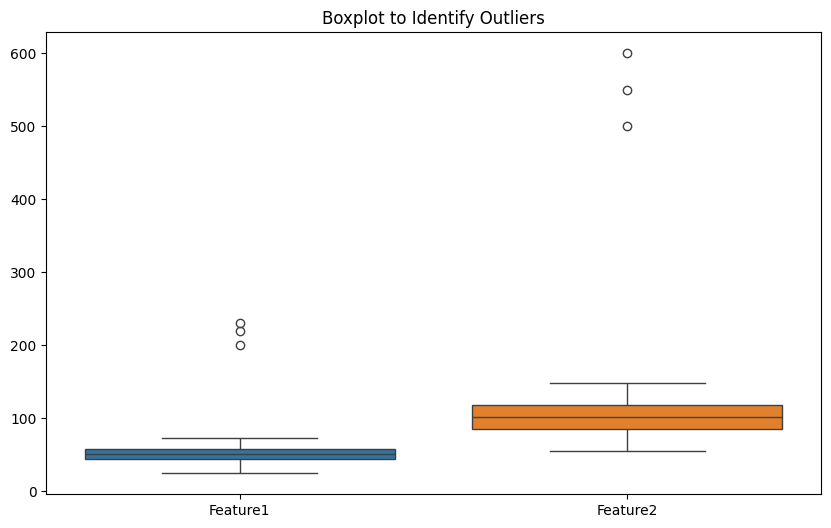

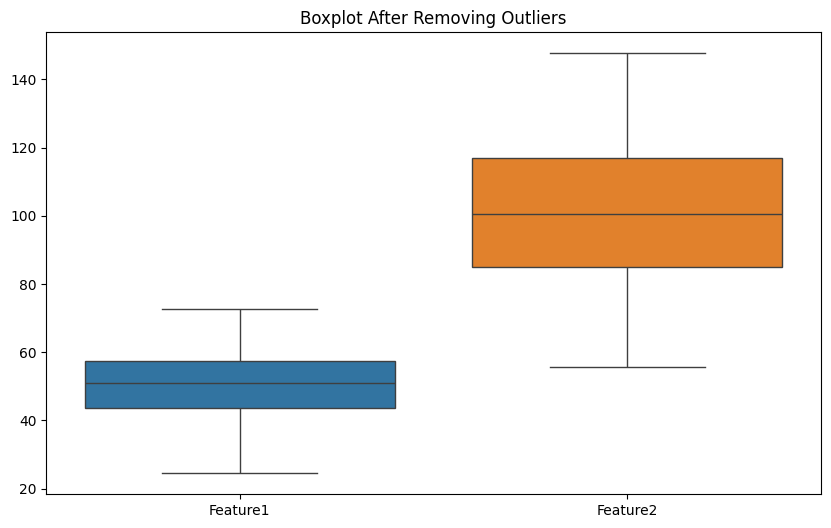


Research and Report on a Technique for Handling Outliers:
One effective method for handling outliers is the Interquartile Range (IQR) method. This method involves calculating the first quartile (Q1) and the third quartile (Q3) of the data and using the IQR to define the bounds for detecting outliers. Any data points that fall outside these bounds are considered outliers and can be removed or adjusted.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (random data with outliers)
np.random.seed(0)
data = {
    'Feature1': np.random.normal(loc=50, scale=10, size=100).tolist() + [200, 220, 230],  # Adding outliers
    'Feature2': np.random.normal(loc=100, scale=20, size=100).tolist() + [500, 550, 600],  # Adding outliers
}

# Create a DataFrame
df = pd.DataFrame(data)

# Task 1: Visualize the dataset and identify outliers using a boxplot
plt.figure(figsize=(10, 6))

# Plotting boxplots for each feature
sns.boxplot(data=df)
plt.title('Boxplot to Identify Outliers')
plt.show()

# Task 2: Remove or adjust outliers using the IQR (Interquartile Range) method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Plot the cleaned dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned)
plt.title('Boxplot After Removing Outliers')
plt.show()

# Task 3: Technique for Handling Outliers (Research and Explanation)
print("\nResearch and Report on a Technique for Handling Outliers:")
print("One effective method for handling outliers is the Interquartile Range (IQR) method. "
      "This method involves calculating the first quartile (Q1) and the third quartile (Q3) of the data and using the IQR to define the bounds for detecting outliers. "
      "Any data points that fall outside these bounds are considered outliers and can be removed or adjusted.")